In [11]:
using PyPlot

In [19]:
f(x::Real,t::Real) = -x^3+sin(t)

function nextPoint(f::Function,x::Real,t::Real,h::Real)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    return x + (k1+2*k2+2*k3+k4)/6.0
end

function adaptiveRungeKutta4(f::Function,f0::Real,a::Real,b::Real,d::Real)

    eps = d*1e-3
    
    h = d^0.25
    x = f0
    xx = [x]
    t = a
    tt = [t]
    
    while t+2*h < b
        
        x1 = nextPoint(f,x,t,h)
        x2 = nextPoint(f,x1,t,h)
        x3 = nextPoint(f,x,t,2*h)
        
        r = min(30.0*h*d/max(abs(x3-x2),eps),16.0)            
        
        while r < 1
            h /= 2
            x1 = nextPoint(f,x,t,h)
            x2 = nextPoint(f,x1,t,h)
            x3 = nextPoint(f,x,t,2*h)
            
            r = min(30.0*h*d/max(abs(x3-x2),eps),16.0)
        end
        
        h *= r^0.25
        x = x2 + (x3-x2)/15.0
        t += 2*h
        push!(xx,x)
        push!(tt,t)
    end
        
    push!(xx,nextPoint(f,x,t,b-t))
    push!(tt,b)
            
    return tt, xx
end

adaptiveRungeKutta4 (generic function with 2 methods)

11416


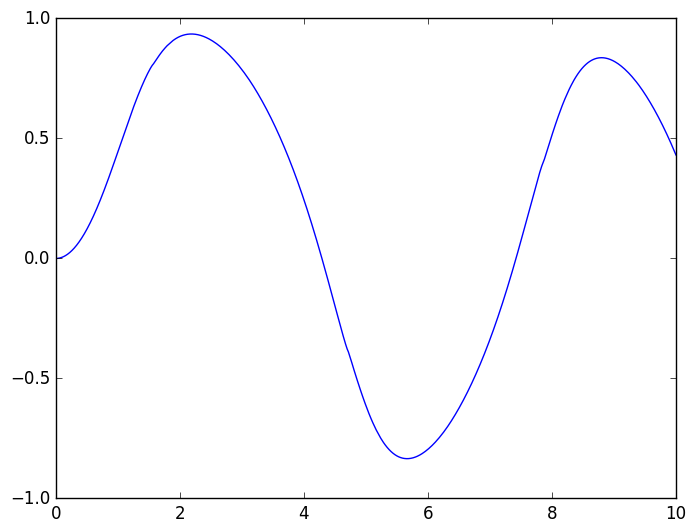

  0.301798 seconds (1.32 M allocations: 20.659 MB, 1.72% gc time)


In [23]:
@time let a = 0.0, b = 10.0, f0 = 0.0, d = 0.00001
    t, x = adaptiveRungeKutta4(f,f0,a,b,d)
    plot(t,x)
    println(length(x))
end